In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple

import shapely.geometry
from descartes import PolygonPatch
from shapely.geometry import box
import shapely.ops as so
# shapely==1.8.4

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def draw_clustering_boundary(cluter_idx: np.ndarray, edge_colors: List, fig_obj: plt.figure,
                             boundary_shift: Tuple[float, float] = (-0.5, 0.5)) -> None:
    for k in range(len(np.unique(cluter_idx))):
        rect_list: List[shapely.geometry.box] = []
        for i in range(cluter_idx.shape[0]):
            for j in range(cluter_idx.shape[1]):
                if cluter_idx[i, j] == (k+1):
                    rect = box(j + boundary_shift[0], i + boundary_shift[0],
                               j + boundary_shift[1], i + boundary_shift[1])
                    rect_list.append(rect)

        new_shape = so.unary_union(rect_list)
        ax = fig_obj.gca()
        # TODO IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed
        # SOLVED conda install shapely==1.8.4
        # TODO ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. 
        # Convert the '.coords' to a numpy array instead. vertices = concatenate([
        ax.add_patch(PolygonPatch(new_shape, ec=edge_colors[k],
                                  fill=False, linewidth=2, zorder=2))

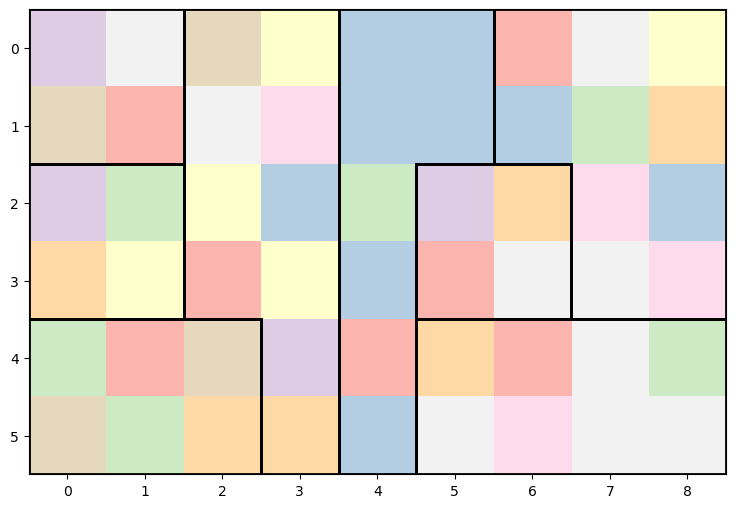

In [4]:
if __name__ == "__main__":
    test_arr: np.ndarray = np.array([[1, 1, 3, 3, 6, 6, 4, 4, 4],
                                     [1, 1, 3, 3, 6, 6, 4, 4, 4],
                                     [2, 2, 3, 3, 6, 8, 8, 4, 4],
                                     [2, 2, 3, 3, 6, 8, 8, 4, 4],
                                     [5, 5, 5, 3, 6, 7, 7, 7, 7],
                                     [5, 5, 5, 3, 6, 7, 7, 7, 7]])

    np.random.seed(42)
    background_image: np.ndarray = np.random.rand(test_arr.shape[0], test_arr.shape[1])

    fig = plt.figure(1, figsize=(9, 9))
    plt.imshow(background_image, cmap='Pastel1')
    edge_colors: List[str] = ['black', 'blue', 'yellow', 'red', 'green', 'magenta', 'gray', 'purple']
    edge_colors: List[str] = ['black' for _ in range(test_arr.shape[1])]
    draw_clustering_boundary(test_arr, edge_colors=edge_colors, fig_obj=fig, boundary_shift=(-0.5, 0.5))
    plt.show()